In [1]:
# first of all import all necessary libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [2]:
# Next we import the training and test data, observe how the data features and labels are merged 
home_mortgage_features= pd.read_csv('train_values.csv')
home_mortgage_labels= pd.read_csv('train_labels.csv')
training_data= pd.merge(left=home_mortgage_features, right=home_mortgage_labels, how= 'left',left_on='row_id',right_on='row_id')
test_data= pd.read_csv('test_values.csv')

In [3]:
training_data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


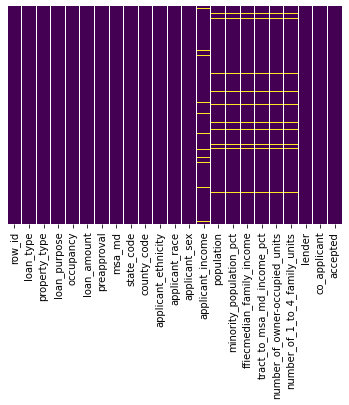

In [4]:
# Check to see any missing data
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  int64  
 2   property_type                   500000 non-null  int64  
 3   loan_purpose                    500000 non-null  int64  
 4   occupancy                       500000 non-null  int64  
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  int64  
 7   msa_md                          500000 non-null  int64  
 8   state_code                      500000 non-null  int64  
 9   county_code                     500000 non-null  int64  
 10  applicant_ethnicity             500000 non-null  int64  
 11  applicant_race                  500000 non-null  int64  
 12  applicant_sex   

In [6]:
training_data.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [7]:
# from the describe, we can see that missing data has been encoded in three columns as -1 (msa_md,state_code and county_code), we will correct that
cols = ['msa_md','state_code','county_code']
for column in cols:
    training_data.loc[training_data[column] == -1 , column] = np.nan
    test_data.loc[test_data[column] == -1, column] = np.nan

In [8]:
#check the column data types
training_data.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                            float64
state_code                        float64
county_code                       float64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [9]:
training_data.shape

(500000, 23)

In [10]:
#we will confirm if the correction we made to the three columns has been applied
cols = ['msa_md','state_code','county_code']
for column in cols:
    count = 0
    count = [count + 1 for x in training_data[cols] if x == -1]
    print(column + ' ' + str(sum(count)))

msa_md 0
state_code 0
county_code 0


In [11]:
# Next, we will make dictionary interpretation for columns that ought to be categorical
ethnicity = {1:'Hispanic_or_Latino', 2:'not_Hispanic_or_Latino', 
                    3:'info_not_provided', 4:'not_applicable',
                    5:'no_coapplicant'}
training_data['applicant_ethnicity'] = [ethnicity[x] for x in training_data['applicant_ethnicity']]
test_data['applicant_ethnicity'] = [ethnicity[x] for x in test_data['applicant_ethnicity']]
training_data['applicant_ethnicity'].value_counts()

not_Hispanic_or_Latino    386061
info_not_provided          57298
Hispanic_or_Latino         50822
not_applicable              5819
Name: applicant_ethnicity, dtype: int64

In [12]:
race = {1:'American_Indian', 2:'Asian', 
                    3:'Black_American', 4:'Native_Hawaiian',
                    5:'White', 6:'info_not_provided', 7:'Not_applicable', 8:'No_coapplicant'}
training_data['applicant_race'] = [race[x] for x in training_data['applicant_race']]
test_data['applicant_race'] = [race[x] for x in test_data['applicant_race']]
training_data['applicant_race'].value_counts()

White                361538
info_not_provided     59862
Black_American        40495
Asian                 25756
Not_applicable         5678
American_Indian        4332
Native_Hawaiian        2339
Name: applicant_race, dtype: int64

In [13]:
sex = {1:'Male', 2:'Female', 
                    3:'info_not_provided', 4:'not_applicable',
                    5:'no_coapplicant'}
training_data['applicant_sex'] = [sex[x] for x in training_data['applicant_sex']]
test_data['applicant_sex'] = [sex[x] for x in test_data['applicant_sex']]
training_data['applicant_sex'].value_counts()

Male                 315806
Female               142876
info_not_provided     35643
not_applicable         5675
Name: applicant_sex, dtype: int64

In [14]:
typeofloan = {1:'Conventional', 2:'FHA_insured', 
                    3:'VA_guaranteed', 4:'FSA/RHS'}
training_data['loan_type'] = [typeofloan[x] for x in training_data['loan_type']]
test_data['loan_type'] = [typeofloan[x] for x in test_data['loan_type']]
training_data['loan_type'].value_counts()

Conventional     370827
FHA_insured       82430
VA_guaranteed     39521
FSA/RHS            7222
Name: loan_type, dtype: int64

In [15]:
typeofproperty = {1:'One_to_four_Family', 2:'Manufactured_Housing', 
                    3:'MultiFamily'}
training_data['property_type'] = [typeofproperty[x] for x in training_data['property_type']]
test_data['property_type'] = [typeofproperty[x] for x in test_data['property_type']]
training_data['property_type'].value_counts()

One_to_four_Family      478217
Manufactured_Housing     19741
MultiFamily               2042
Name: property_type, dtype: int64

In [16]:
purpose = {1:'Home_purchase', 2:'Home_Improvement', 
                    3:'Refinancing'}
training_data['loan_purpose'] = [purpose[x] for x in training_data['loan_purpose']]
test_data['loan_purpose'] = [purpose[x] for x in test_data['loan_purpose']]
training_data['loan_purpose'].value_counts()

Refinancing         242670
Home_purchase       209265
Home_Improvement     48065
Name: loan_purpose, dtype: int64

In [17]:
occupancy_con = {1:'owner_occupied', 2:'not_owner_occupied', 
                    3:'not_applicable'}
training_data['occupancy'] = [occupancy_con[x] for x in training_data['occupancy']]
test_data['occupancy'] = [occupancy_con[x] for x in test_data['occupancy']]
training_data['occupancy'].value_counts()

owner_occupied        447394
not_owner_occupied     50417
not_applicable          2189
Name: occupancy, dtype: int64

In [18]:
pre_approval = {1:'Preapproval_requested', 2:'Preapproval_not_requested', 
                    3:'Not_applicable'}
training_data['preapproval'] = [pre_approval[x] for x in training_data['preapproval']]
test_data['preapproval'] = [pre_approval[x] for x in test_data['preapproval']]
training_data['preapproval'].value_counts()

Not_applicable               411109
Preapproval_not_requested     60143
Preapproval_requested         28748
Name: preapproval, dtype: int64

In [19]:
training_data['co_applicant']= training_data['co_applicant'].astype(int)
test_data['co_applicant']= test_data['co_applicant'].astype(int)
training_data['co_applicant'].value_counts()

0    299974
1    200026
Name: co_applicant, dtype: int64

Text(0.5, 0, 'log_loan_amount')

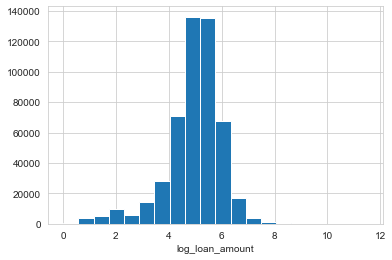

In [20]:
# Next we will make some data visualizations
training_data['log_loan_amount'] = np.log(training_data['loan_amount'])
test_data['log_loan_amount'] = np.log(test_data['loan_amount'])

sns.set_style('whitegrid')
training_data['log_loan_amount'].hist(bins=20)
plt.xlabel('log_loan_amount')

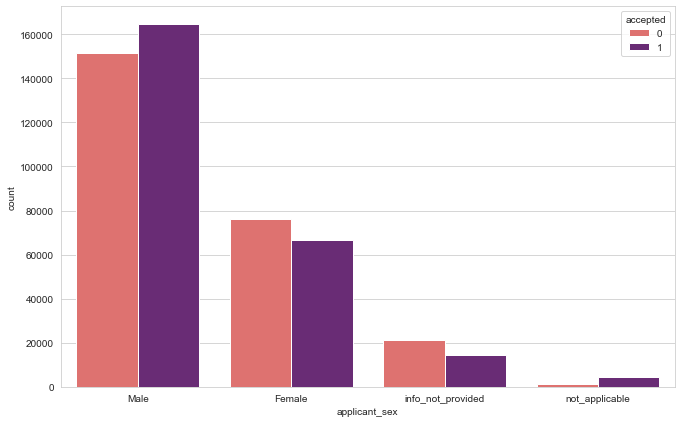

In [21]:
plt.figure(figsize=(11,7))
sns.countplot(x='applicant_sex',hue='accepted',data=training_data,palette='magma_r')

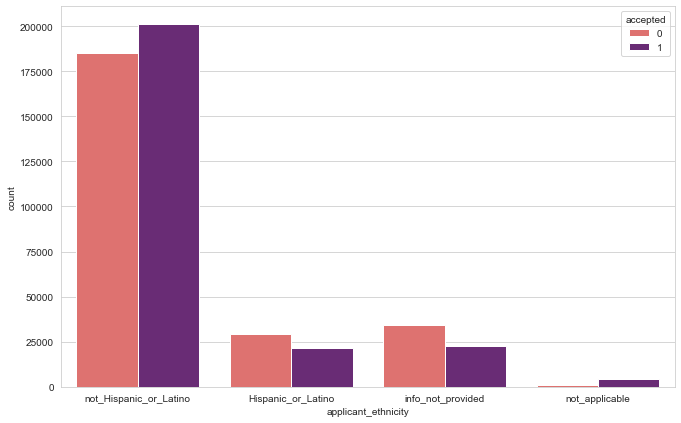

In [22]:
plt.figure(figsize=(11,7))
sns.countplot(x='applicant_ethnicity',hue='accepted',data=training_data,palette='magma_r')

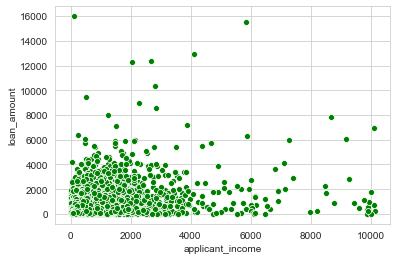

In [23]:
sns.scatterplot(x='applicant_income',y='loan_amount',data=training_data,color='green')

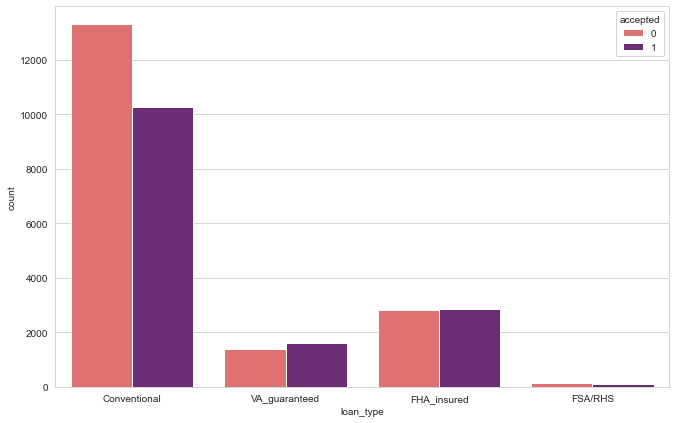

In [24]:
plt.figure(figsize=(11,7))
sns.countplot(x='loan_type',hue='accepted',data=training_data[training_data['state_code']==2],palette='magma_r')

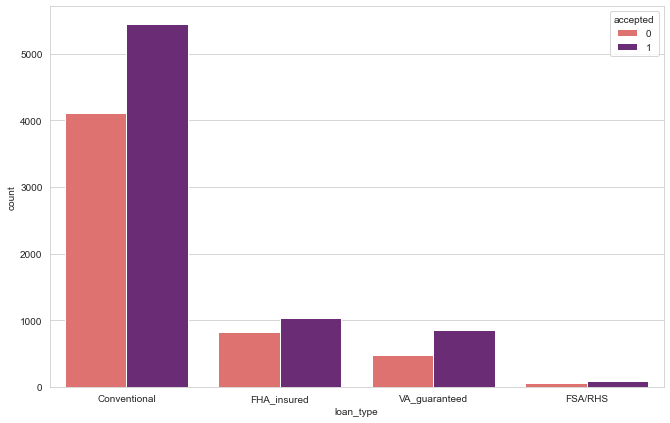

In [25]:
plt.figure(figsize=(11,7))
sns.countplot(x='loan_type',hue='accepted',data=training_data[training_data['state_code']==4],palette='magma_r')

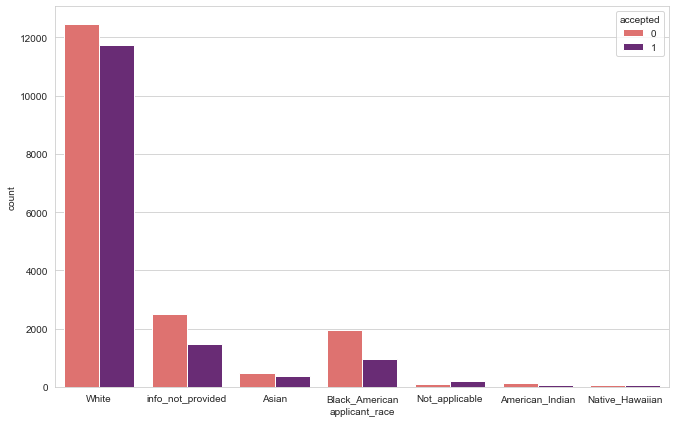

In [26]:
plt.figure(figsize=(11,7))
sns.countplot(x='applicant_race',hue='accepted',data=training_data[training_data['state_code']==2],palette='magma_r')

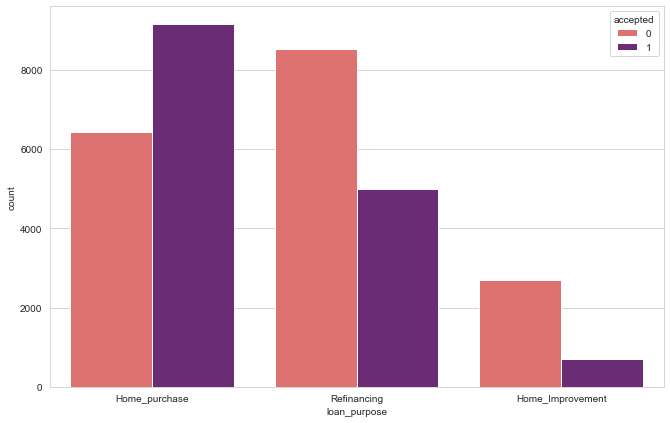

In [27]:
plt.figure(figsize=(11,7))
sns.countplot(x='loan_purpose',hue='accepted',data=training_data[training_data['state_code']==2],palette='magma_r')

In [28]:
training_data['co_applicant']= training_data[['co_applicant']].astype(int)
training_data.drop(['log_loan_amount',],axis=1, inplace=True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  object 
 2   property_type                   500000 non-null  object 
 3   loan_purpose                    500000 non-null  object 
 4   occupancy                       500000 non-null  object 
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  object 
 7   msa_md                          423018 non-null  float64
 8   state_code                      480868 non-null  float64
 9   county_code                     479534 non-null  float64
 10  applicant_ethnicity             500000 non-null  object 
 11  applicant_race                  500000 non-null  object 
 12  applicant_sex   

In [29]:
# we will fill missing data with median values for location codes and mean values for the other columns
training_data[['msa_md','state_code','county_code']]=training_data[['msa_md','state_code','county_code']].fillna(training_data[['msa_md','state_code','county_code']].median())
training_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']]=training_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']].fillna(training_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']].mean())

In [30]:
test_data[['msa_md','state_code','county_code']]=test_data[['msa_md','state_code','county_code']].fillna(test_data[['msa_md','state_code','county_code']].median())
test_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']]=test_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']].fillna(test_data[['applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']].mean())

In [31]:
# we will create a new column called loan_income_ratio for both test and training set
training_data['loan_income_ratio']= (training_data['loan_amount']/training_data['applicant_income'])
training_data.info()
test_data['loan_income_ratio']= (training_data['loan_amount']/training_data['applicant_income'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  object 
 2   property_type                   500000 non-null  object 
 3   loan_purpose                    500000 non-null  object 
 4   occupancy                       500000 non-null  object 
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  object 
 7   msa_md                          500000 non-null  float64
 8   state_code                      500000 non-null  float64
 9   county_code                     500000 non-null  float64
 10  applicant_ethnicity             500000 non-null  object 
 11  applicant_race                  500000 non-null  object 
 12  applicant_sex   

In [32]:
# let us create our features and labels matrix
y = training_data['accepted']
x = training_data.drop(['row_id','accepted'],axis=1,inplace=True)


In [36]:
x = training_data

In [38]:
x.dtypes

loan_type                          object
property_type                      object
loan_purpose                       object
occupancy                          object
loan_amount                       float64
preapproval                        object
msa_md                            float64
state_code                        float64
county_code                       float64
applicant_ethnicity                object
applicant_race                     object
applicant_sex                      object
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                        int32
loan_income_ratio                 float64
dtype: object

In [39]:
cat_features_index = np.where(x.dtypes != float)[0]

In [41]:
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
import sklearn.model_selection as ms

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [47]:
model = CatBoostClassifier(iterations=1500, depth=10, learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=42)

In [48]:
model.fit(xtrain,ytrain,cat_features=cat_features_index,eval_set=(xtest,ytest))

0:	learn: 0.6973950	test: 0.6995200	best: 0.6995200 (0)	total: 1.06s	remaining: 26m 28s
1:	learn: 0.7036900	test: 0.7043400	best: 0.7043400 (1)	total: 2.13s	remaining: 26m 34s
2:	learn: 0.7049650	test: 0.7067500	best: 0.7067500 (2)	total: 3.02s	remaining: 25m 8s
3:	learn: 0.7058775	test: 0.7074300	best: 0.7074300 (3)	total: 4.07s	remaining: 25m 22s
4:	learn: 0.7056575	test: 0.7071300	best: 0.7074300 (3)	total: 5.12s	remaining: 25m 30s
5:	learn: 0.7055650	test: 0.7073600	best: 0.7074300 (3)	total: 6.09s	remaining: 25m 17s
6:	learn: 0.7054800	test: 0.7070200	best: 0.7074300 (3)	total: 7.16s	remaining: 25m 27s
7:	learn: 0.7053000	test: 0.7068600	best: 0.7074300 (3)	total: 8.1s	remaining: 25m 10s
8:	learn: 0.7061850	test: 0.7075900	best: 0.7075900 (8)	total: 9.17s	remaining: 25m 19s
9:	learn: 0.7060550	test: 0.7080100	best: 0.7080100 (9)	total: 10.3s	remaining: 25m 37s
10:	learn: 0.7063775	test: 0.7081200	best: 0.7081200 (10)	total: 11.5s	remaining: 25m 56s
11:	learn: 0.7064475	test: 0.708

92:	learn: 0.7115475	test: 0.7139200	best: 0.7139200 (92)	total: 1m 46s	remaining: 26m 58s
93:	learn: 0.7115050	test: 0.7138100	best: 0.7139200 (92)	total: 1m 48s	remaining: 26m 58s
94:	learn: 0.7115450	test: 0.7137700	best: 0.7139200 (92)	total: 1m 49s	remaining: 27m 1s
95:	learn: 0.7115825	test: 0.7138100	best: 0.7139200 (92)	total: 1m 50s	remaining: 26m 59s
96:	learn: 0.7116650	test: 0.7137200	best: 0.7139200 (92)	total: 1m 51s	remaining: 26m 59s
97:	learn: 0.7117300	test: 0.7137400	best: 0.7139200 (92)	total: 1m 53s	remaining: 26m 57s
98:	learn: 0.7117425	test: 0.7138400	best: 0.7139200 (92)	total: 1m 54s	remaining: 26m 59s
99:	learn: 0.7118250	test: 0.7137500	best: 0.7139200 (92)	total: 1m 55s	remaining: 26m 57s
100:	learn: 0.7117825	test: 0.7138100	best: 0.7139200 (92)	total: 1m 56s	remaining: 26m 58s
101:	learn: 0.7118025	test: 0.7138900	best: 0.7139200 (92)	total: 1m 58s	remaining: 26m 59s
102:	learn: 0.7117900	test: 0.7139000	best: 0.7139200 (92)	total: 1m 59s	remaining: 27m
1

182:	learn: 0.7158800	test: 0.7177800	best: 0.7177800 (182)	total: 3m 37s	remaining: 26m 3s
183:	learn: 0.7158550	test: 0.7177800	best: 0.7177800 (182)	total: 3m 38s	remaining: 26m 4s
184:	learn: 0.7159350	test: 0.7177700	best: 0.7177800 (182)	total: 3m 39s	remaining: 26m 2s
185:	learn: 0.7160075	test: 0.7178400	best: 0.7178400 (185)	total: 3m 40s	remaining: 26m 1s
186:	learn: 0.7160825	test: 0.7178900	best: 0.7178900 (186)	total: 3m 42s	remaining: 26m
187:	learn: 0.7161225	test: 0.7179400	best: 0.7179400 (187)	total: 3m 43s	remaining: 25m 58s
188:	learn: 0.7161875	test: 0.7180800	best: 0.7180800 (188)	total: 3m 44s	remaining: 25m 56s
189:	learn: 0.7161925	test: 0.7181100	best: 0.7181100 (189)	total: 3m 45s	remaining: 25m 56s
190:	learn: 0.7162200	test: 0.7181400	best: 0.7181400 (190)	total: 3m 46s	remaining: 25m 54s
191:	learn: 0.7162700	test: 0.7182900	best: 0.7182900 (191)	total: 3m 48s	remaining: 25m 53s
192:	learn: 0.7162850	test: 0.7182300	best: 0.7182900 (191)	total: 3m 49s	rema

271:	learn: 0.7187950	test: 0.7206900	best: 0.7206900 (271)	total: 5m 28s	remaining: 24m 43s
272:	learn: 0.7188225	test: 0.7207100	best: 0.7207100 (272)	total: 5m 29s	remaining: 24m 42s
273:	learn: 0.7188525	test: 0.7206600	best: 0.7207100 (272)	total: 5m 31s	remaining: 24m 41s
274:	learn: 0.7188425	test: 0.7207000	best: 0.7207100 (272)	total: 5m 32s	remaining: 24m 41s
275:	learn: 0.7188500	test: 0.7206800	best: 0.7207100 (272)	total: 5m 33s	remaining: 24m 40s
276:	learn: 0.7189050	test: 0.7206000	best: 0.7207100 (272)	total: 5m 35s	remaining: 24m 40s
277:	learn: 0.7189150	test: 0.7206300	best: 0.7207100 (272)	total: 5m 36s	remaining: 24m 39s
278:	learn: 0.7189350	test: 0.7207500	best: 0.7207500 (278)	total: 5m 37s	remaining: 24m 39s
279:	learn: 0.7189400	test: 0.7207300	best: 0.7207500 (278)	total: 5m 39s	remaining: 24m 39s
280:	learn: 0.7189875	test: 0.7207400	best: 0.7207500 (278)	total: 5m 40s	remaining: 24m 37s
281:	learn: 0.7190650	test: 0.7208300	best: 0.7208300 (281)	total: 5m 

360:	learn: 0.7212475	test: 0.7219300	best: 0.7220700 (353)	total: 7m 28s	remaining: 23m 35s
361:	learn: 0.7212975	test: 0.7220000	best: 0.7220700 (353)	total: 7m 30s	remaining: 23m 35s
362:	learn: 0.7213075	test: 0.7220200	best: 0.7220700 (353)	total: 7m 31s	remaining: 23m 34s
363:	learn: 0.7213425	test: 0.7220500	best: 0.7220700 (353)	total: 7m 32s	remaining: 23m 32s
364:	learn: 0.7213125	test: 0.7220500	best: 0.7220700 (353)	total: 7m 34s	remaining: 23m 31s
365:	learn: 0.7212925	test: 0.7221500	best: 0.7221500 (365)	total: 7m 35s	remaining: 23m 30s
366:	learn: 0.7213200	test: 0.7221600	best: 0.7221600 (366)	total: 7m 36s	remaining: 23m 29s
367:	learn: 0.7213200	test: 0.7221200	best: 0.7221600 (366)	total: 7m 38s	remaining: 23m 29s
368:	learn: 0.7213475	test: 0.7222100	best: 0.7222100 (368)	total: 7m 39s	remaining: 23m 28s
369:	learn: 0.7213725	test: 0.7222300	best: 0.7222300 (369)	total: 7m 41s	remaining: 23m 27s
370:	learn: 0.7214250	test: 0.7222000	best: 0.7222300 (369)	total: 7m 

449:	learn: 0.7234100	test: 0.7232100	best: 0.7232100 (449)	total: 9m 28s	remaining: 22m 6s
450:	learn: 0.7234250	test: 0.7232100	best: 0.7232100 (449)	total: 9m 29s	remaining: 22m 5s
451:	learn: 0.7234600	test: 0.7232600	best: 0.7232600 (451)	total: 9m 31s	remaining: 22m 4s
452:	learn: 0.7234650	test: 0.7232900	best: 0.7232900 (452)	total: 9m 32s	remaining: 22m 4s
453:	learn: 0.7235150	test: 0.7232400	best: 0.7232900 (452)	total: 9m 34s	remaining: 22m 3s
454:	learn: 0.7235550	test: 0.7233000	best: 0.7233000 (454)	total: 9m 35s	remaining: 22m 1s
455:	learn: 0.7235900	test: 0.7233200	best: 0.7233200 (455)	total: 9m 36s	remaining: 22m
456:	learn: 0.7236100	test: 0.7232700	best: 0.7233200 (455)	total: 9m 38s	remaining: 21m 59s
457:	learn: 0.7236100	test: 0.7233100	best: 0.7233200 (455)	total: 9m 39s	remaining: 21m 58s
458:	learn: 0.7235950	test: 0.7233000	best: 0.7233200 (455)	total: 9m 41s	remaining: 21m 57s
459:	learn: 0.7236200	test: 0.7233200	best: 0.7233200 (455)	total: 9m 42s	remain

537:	learn: 0.7251725	test: 0.7247400	best: 0.7247600 (535)	total: 11m 26s	remaining: 20m 27s
538:	learn: 0.7251875	test: 0.7248200	best: 0.7248200 (538)	total: 11m 27s	remaining: 20m 26s
539:	learn: 0.7252100	test: 0.7247900	best: 0.7248200 (538)	total: 11m 29s	remaining: 20m 25s
540:	learn: 0.7252200	test: 0.7247800	best: 0.7248200 (538)	total: 11m 29s	remaining: 20m 21s
541:	learn: 0.7252350	test: 0.7248800	best: 0.7248800 (541)	total: 11m 30s	remaining: 20m 20s
542:	learn: 0.7252700	test: 0.7249200	best: 0.7249200 (542)	total: 11m 31s	remaining: 20m 19s
543:	learn: 0.7252675	test: 0.7249500	best: 0.7249500 (543)	total: 11m 32s	remaining: 20m 17s
544:	learn: 0.7252700	test: 0.7249200	best: 0.7249500 (543)	total: 11m 34s	remaining: 20m 16s
545:	learn: 0.7252950	test: 0.7249300	best: 0.7249500 (543)	total: 11m 35s	remaining: 20m 15s
546:	learn: 0.7252975	test: 0.7249100	best: 0.7249500 (543)	total: 11m 36s	remaining: 20m 14s
547:	learn: 0.7253450	test: 0.7249400	best: 0.7249500 (543)	

625:	learn: 0.7264625	test: 0.7257100	best: 0.7257100 (625)	total: 13m 24s	remaining: 18m 43s
626:	learn: 0.7264625	test: 0.7257200	best: 0.7257200 (626)	total: 13m 25s	remaining: 18m 40s
627:	learn: 0.7264775	test: 0.7256700	best: 0.7257200 (626)	total: 13m 26s	remaining: 18m 39s
628:	learn: 0.7264875	test: 0.7256800	best: 0.7257200 (626)	total: 13m 27s	remaining: 18m 38s
629:	learn: 0.7264875	test: 0.7256100	best: 0.7257200 (626)	total: 13m 28s	remaining: 18m 36s
630:	learn: 0.7265225	test: 0.7256400	best: 0.7257200 (626)	total: 13m 30s	remaining: 18m 35s
631:	learn: 0.7265600	test: 0.7256600	best: 0.7257200 (626)	total: 13m 31s	remaining: 18m 34s
632:	learn: 0.7265525	test: 0.7256500	best: 0.7257200 (626)	total: 13m 32s	remaining: 18m 33s
633:	learn: 0.7265225	test: 0.7256800	best: 0.7257200 (626)	total: 13m 34s	remaining: 18m 32s
634:	learn: 0.7265400	test: 0.7256700	best: 0.7257200 (626)	total: 13m 35s	remaining: 18m 30s
635:	learn: 0.7265600	test: 0.7257100	best: 0.7257200 (626)	

713:	learn: 0.7276050	test: 0.7264000	best: 0.7264700 (711)	total: 15m 22s	remaining: 16m 56s
714:	learn: 0.7276400	test: 0.7264100	best: 0.7264700 (711)	total: 15m 24s	remaining: 16m 55s
715:	learn: 0.7276450	test: 0.7264600	best: 0.7264700 (711)	total: 15m 25s	remaining: 16m 53s
716:	learn: 0.7276700	test: 0.7264800	best: 0.7264800 (716)	total: 15m 27s	remaining: 16m 52s
717:	learn: 0.7277325	test: 0.7265200	best: 0.7265200 (717)	total: 15m 28s	remaining: 16m 51s
718:	learn: 0.7277400	test: 0.7265100	best: 0.7265200 (717)	total: 15m 29s	remaining: 16m 50s
719:	learn: 0.7277400	test: 0.7264600	best: 0.7265200 (717)	total: 15m 31s	remaining: 16m 48s
720:	learn: 0.7277400	test: 0.7264400	best: 0.7265200 (717)	total: 15m 32s	remaining: 16m 47s
721:	learn: 0.7277500	test: 0.7265000	best: 0.7265200 (717)	total: 15m 33s	remaining: 16m 46s
722:	learn: 0.7277825	test: 0.7265000	best: 0.7265200 (717)	total: 15m 35s	remaining: 16m 45s
723:	learn: 0.7277625	test: 0.7264000	best: 0.7265200 (717)	

801:	learn: 0.7289125	test: 0.7266200	best: 0.7267100 (797)	total: 17m 22s	remaining: 15m 6s
802:	learn: 0.7289100	test: 0.7266000	best: 0.7267100 (797)	total: 17m 23s	remaining: 15m 5s
803:	learn: 0.7289150	test: 0.7265400	best: 0.7267100 (797)	total: 17m 24s	remaining: 15m 4s
804:	learn: 0.7289400	test: 0.7266100	best: 0.7267100 (797)	total: 17m 26s	remaining: 15m 3s
805:	learn: 0.7289625	test: 0.7265800	best: 0.7267100 (797)	total: 17m 27s	remaining: 15m 1s
806:	learn: 0.7289550	test: 0.7265100	best: 0.7267100 (797)	total: 17m 28s	remaining: 15m
807:	learn: 0.7289825	test: 0.7265200	best: 0.7267100 (797)	total: 17m 29s	remaining: 14m 59s
808:	learn: 0.7289800	test: 0.7265100	best: 0.7267100 (797)	total: 17m 31s	remaining: 14m 58s
809:	learn: 0.7289700	test: 0.7265000	best: 0.7267100 (797)	total: 17m 32s	remaining: 14m 56s
810:	learn: 0.7290100	test: 0.7265000	best: 0.7267100 (797)	total: 17m 34s	remaining: 14m 55s
811:	learn: 0.7290100	test: 0.7264900	best: 0.7267100 (797)	total: 17

889:	learn: 0.7300925	test: 0.7269200	best: 0.7269300 (840)	total: 19m 23s	remaining: 13m 17s
890:	learn: 0.7301100	test: 0.7269400	best: 0.7269400 (890)	total: 19m 24s	remaining: 13m 15s
891:	learn: 0.7301250	test: 0.7269300	best: 0.7269400 (890)	total: 19m 25s	remaining: 13m 14s
892:	learn: 0.7301100	test: 0.7269100	best: 0.7269400 (890)	total: 19m 27s	remaining: 13m 13s
893:	learn: 0.7301275	test: 0.7268900	best: 0.7269400 (890)	total: 19m 28s	remaining: 13m 11s
894:	learn: 0.7301425	test: 0.7269300	best: 0.7269400 (890)	total: 19m 29s	remaining: 13m 10s
895:	learn: 0.7301600	test: 0.7269200	best: 0.7269400 (890)	total: 19m 31s	remaining: 13m 9s
896:	learn: 0.7301400	test: 0.7269000	best: 0.7269400 (890)	total: 19m 32s	remaining: 13m 8s
897:	learn: 0.7301725	test: 0.7269300	best: 0.7269400 (890)	total: 19m 33s	remaining: 13m 6s
898:	learn: 0.7301900	test: 0.7269000	best: 0.7269400 (890)	total: 19m 34s	remaining: 13m 5s
899:	learn: 0.7302075	test: 0.7268700	best: 0.7269400 (890)	tota

977:	learn: 0.7313825	test: 0.7271900	best: 0.7271900 (977)	total: 21m 22s	remaining: 11m 24s
978:	learn: 0.7313975	test: 0.7271800	best: 0.7271900 (977)	total: 21m 24s	remaining: 11m 23s
979:	learn: 0.7314075	test: 0.7270700	best: 0.7271900 (977)	total: 21m 25s	remaining: 11m 21s
980:	learn: 0.7314350	test: 0.7271100	best: 0.7271900 (977)	total: 21m 26s	remaining: 11m 20s
981:	learn: 0.7314300	test: 0.7271200	best: 0.7271900 (977)	total: 21m 28s	remaining: 11m 19s
982:	learn: 0.7314250	test: 0.7271300	best: 0.7271900 (977)	total: 21m 29s	remaining: 11m 18s
983:	learn: 0.7314425	test: 0.7271100	best: 0.7271900 (977)	total: 21m 30s	remaining: 11m 16s
984:	learn: 0.7314275	test: 0.7271000	best: 0.7271900 (977)	total: 21m 32s	remaining: 11m 15s
985:	learn: 0.7314400	test: 0.7271700	best: 0.7271900 (977)	total: 21m 33s	remaining: 11m 14s
986:	learn: 0.7314700	test: 0.7271900	best: 0.7271900 (977)	total: 21m 34s	remaining: 11m 13s
987:	learn: 0.7314675	test: 0.7272000	best: 0.7272000 (987)	

1064:	learn: 0.7322800	test: 0.7274200	best: 0.7275000 (1030)	total: 23m 23s	remaining: 9m 33s
1065:	learn: 0.7323150	test: 0.7274400	best: 0.7275000 (1030)	total: 23m 25s	remaining: 9m 32s
1066:	learn: 0.7323175	test: 0.7274500	best: 0.7275000 (1030)	total: 23m 26s	remaining: 9m 30s
1067:	learn: 0.7323650	test: 0.7274500	best: 0.7275000 (1030)	total: 23m 27s	remaining: 9m 29s
1068:	learn: 0.7323675	test: 0.7274900	best: 0.7275000 (1030)	total: 23m 29s	remaining: 9m 28s
1069:	learn: 0.7323900	test: 0.7274700	best: 0.7275000 (1030)	total: 23m 30s	remaining: 9m 26s
1070:	learn: 0.7323900	test: 0.7274800	best: 0.7275000 (1030)	total: 23m 31s	remaining: 9m 25s
1071:	learn: 0.7324050	test: 0.7274800	best: 0.7275000 (1030)	total: 23m 33s	remaining: 9m 24s
1072:	learn: 0.7324175	test: 0.7274600	best: 0.7275000 (1030)	total: 23m 34s	remaining: 9m 22s
1073:	learn: 0.7324275	test: 0.7274900	best: 0.7275000 (1030)	total: 23m 35s	remaining: 9m 21s
1074:	learn: 0.7324350	test: 0.7275000	best: 0.727

1151:	learn: 0.7333650	test: 0.7278300	best: 0.7279200 (1138)	total: 25m 23s	remaining: 7m 40s
1152:	learn: 0.7333925	test: 0.7278300	best: 0.7279200 (1138)	total: 25m 24s	remaining: 7m 38s
1153:	learn: 0.7333925	test: 0.7278600	best: 0.7279200 (1138)	total: 25m 26s	remaining: 7m 37s
1154:	learn: 0.7333925	test: 0.7279000	best: 0.7279200 (1138)	total: 25m 27s	remaining: 7m 36s
1155:	learn: 0.7334000	test: 0.7279200	best: 0.7279200 (1138)	total: 25m 28s	remaining: 7m 34s
1156:	learn: 0.7333975	test: 0.7279300	best: 0.7279300 (1156)	total: 25m 30s	remaining: 7m 33s
1157:	learn: 0.7334025	test: 0.7279000	best: 0.7279300 (1156)	total: 25m 31s	remaining: 7m 32s
1158:	learn: 0.7334225	test: 0.7278900	best: 0.7279300 (1156)	total: 25m 33s	remaining: 7m 31s
1159:	learn: 0.7334450	test: 0.7279200	best: 0.7279300 (1156)	total: 25m 34s	remaining: 7m 29s
1160:	learn: 0.7334575	test: 0.7279400	best: 0.7279400 (1160)	total: 25m 36s	remaining: 7m 28s
1161:	learn: 0.7334775	test: 0.7279400	best: 0.727

1238:	learn: 0.7344700	test: 0.7284200	best: 0.7284400 (1233)	total: 27m 24s	remaining: 5m 46s
1239:	learn: 0.7344750	test: 0.7284200	best: 0.7284400 (1233)	total: 27m 25s	remaining: 5m 45s
1240:	learn: 0.7344475	test: 0.7284100	best: 0.7284400 (1233)	total: 27m 27s	remaining: 5m 43s
1241:	learn: 0.7344675	test: 0.7284000	best: 0.7284400 (1233)	total: 27m 28s	remaining: 5m 42s
1242:	learn: 0.7344975	test: 0.7284600	best: 0.7284600 (1242)	total: 27m 29s	remaining: 5m 41s
1243:	learn: 0.7345150	test: 0.7285000	best: 0.7285000 (1243)	total: 27m 31s	remaining: 5m 39s
1244:	learn: 0.7345200	test: 0.7285200	best: 0.7285200 (1244)	total: 27m 32s	remaining: 5m 38s
1245:	learn: 0.7345000	test: 0.7284800	best: 0.7285200 (1244)	total: 27m 33s	remaining: 5m 37s
1246:	learn: 0.7345275	test: 0.7285200	best: 0.7285200 (1244)	total: 27m 35s	remaining: 5m 35s
1247:	learn: 0.7345500	test: 0.7284900	best: 0.7285200 (1244)	total: 27m 36s	remaining: 5m 34s
1248:	learn: 0.7345350	test: 0.7284600	best: 0.728

1325:	learn: 0.7354125	test: 0.7289900	best: 0.7290100 (1323)	total: 29m 25s	remaining: 3m 51s
1326:	learn: 0.7354075	test: 0.7290000	best: 0.7290100 (1323)	total: 29m 26s	remaining: 3m 50s
1327:	learn: 0.7354250	test: 0.7290500	best: 0.7290500 (1327)	total: 29m 28s	remaining: 3m 49s
1328:	learn: 0.7354700	test: 0.7290100	best: 0.7290500 (1327)	total: 29m 29s	remaining: 3m 47s
1329:	learn: 0.7354650	test: 0.7290200	best: 0.7290500 (1327)	total: 29m 31s	remaining: 3m 46s
1330:	learn: 0.7355025	test: 0.7290400	best: 0.7290500 (1327)	total: 29m 32s	remaining: 3m 45s
1331:	learn: 0.7355250	test: 0.7291100	best: 0.7291100 (1331)	total: 29m 34s	remaining: 3m 43s
1332:	learn: 0.7355400	test: 0.7291200	best: 0.7291200 (1332)	total: 29m 35s	remaining: 3m 42s
1333:	learn: 0.7355425	test: 0.7291200	best: 0.7291200 (1332)	total: 29m 36s	remaining: 3m 41s
1334:	learn: 0.7355425	test: 0.7291300	best: 0.7291300 (1334)	total: 29m 38s	remaining: 3m 39s
1335:	learn: 0.7355350	test: 0.7291200	best: 0.729

1412:	learn: 0.7364525	test: 0.7293200	best: 0.7293900 (1394)	total: 31m 26s	remaining: 1m 56s
1413:	learn: 0.7364600	test: 0.7292700	best: 0.7293900 (1394)	total: 31m 28s	remaining: 1m 54s
1414:	learn: 0.7364575	test: 0.7292700	best: 0.7293900 (1394)	total: 31m 29s	remaining: 1m 53s
1415:	learn: 0.7364650	test: 0.7292400	best: 0.7293900 (1394)	total: 31m 30s	remaining: 1m 52s
1416:	learn: 0.7364950	test: 0.7292000	best: 0.7293900 (1394)	total: 31m 32s	remaining: 1m 50s
1417:	learn: 0.7364975	test: 0.7292300	best: 0.7293900 (1394)	total: 31m 33s	remaining: 1m 49s
1418:	learn: 0.7364900	test: 0.7292400	best: 0.7293900 (1394)	total: 31m 34s	remaining: 1m 48s
1419:	learn: 0.7365275	test: 0.7292000	best: 0.7293900 (1394)	total: 31m 36s	remaining: 1m 46s
1420:	learn: 0.7365400	test: 0.7291700	best: 0.7293900 (1394)	total: 31m 37s	remaining: 1m 45s
1421:	learn: 0.7365500	test: 0.7291800	best: 0.7293900 (1394)	total: 31m 38s	remaining: 1m 44s
1422:	learn: 0.7365750	test: 0.7291600	best: 0.729

In [49]:
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest, model.predict(xtest))))

the test accuracy is :0.729500


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  object 
 2   property_type                   500000 non-null  object 
 3   loan_purpose                    500000 non-null  object 
 4   occupancy                       500000 non-null  object 
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  object 
 7   msa_md                          500000 non-null  float64
 8   state_code                      500000 non-null  float64
 9   county_code                     500000 non-null  float64
 10  applicant_ethnicity             500000 non-null  object 
 11  applicant_race                  500000 non-null  object 
 12  applicant_sex   

In [55]:
pred = model.predict(test_data.drop(['row_id'],axis=1))
pred = pred.astype(np.int)

In [56]:
submission = pd.DataFrame({'accepted':pred,'row_id':test_data['row_id']})

In [57]:
submission.to_csv('answer_file.csv',index=False)

In [63]:
pd.DataFrame({'feature_importance': model.get_feature_importance(Pool(xtrain, ytrain, cat_features= cat_features_index)), 
              'feature_names': x.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
19,23.907547,lender
2,10.486680,loan_purpose
16,10.360109,tract_to_msa_md_income_pct
14,10.139375,minority_population_pct
12,6.502421,applicant_income
21,6.306972,loan_income_ratio
5,5.704527,preapproval
4,3.691176,loan_amount
10,3.052844,applicant_race
7,2.787819,state_code
